This is a Toy project

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score;
from mlxtend.plotting import plot_decision_regions;
import pickle;

In [2]:
dataFrame = pd.read_csv("placement.csv");

In [3]:
dataFrame.info() #here I check the information regarding to the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


step 1 -> data preprocessing

In [4]:
dataFrame = dataFrame.iloc[:,1:];# iloc - > integer location based on indexing 
# here I take all the rows and all the columns except the first one
print(dataFrame.head());

   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0


Data visulization

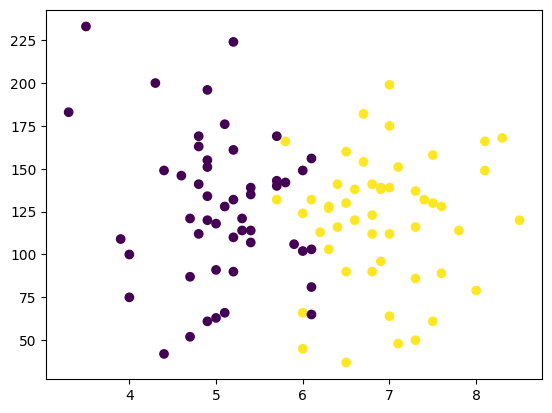

In [5]:
plt.scatter(dataFrame['cgpa'],dataFrame['iq'],c=dataFrame['placement']); #it's a scatter plot between cgpa and iq of data frame
# and color all the student (who are placed = yellow, who are not placed = violet)

differentiate dependent and independent varibales because I use logistic regression

In [6]:
x = dataFrame.iloc[:,0:2];# here I take cgpa and iq column which are the indepentent variables
y = dataFrame.iloc[:,-1];# here I take the placement column which is the dependent variable
print(x.head());
print(y.head());

   cgpa     iq
0   6.8  123.0
1   5.9  106.0
2   5.3  121.0
3   7.4  132.0
4   5.8  142.0
0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1); #here I split the data into training and testing data where first one is the independent
# variable and second one is the dependent variable and test_size is the size of the testing data
# here I take 0.1 means 10% of the data is testing data and 90% is training data

In [8]:
print(x_test)
print(y_test)
print(x_train)
print(y_train)

    cgpa     iq
63   6.3  128.0
81   5.4  107.0
86   5.1  128.0
64   7.0   64.0
38   6.5  160.0
7    5.0   63.0
96   4.4   42.0
84   5.7  169.0
55   7.8  114.0
90   7.3   86.0
63    1
81    0
86    0
64    1
38    1
7     0
96    0
84    0
55    1
90    1
Name: placement, dtype: int64
    cgpa     iq
18   4.0  100.0
61   7.3  137.0
50   3.5  233.0
56   6.1   65.0
97   6.7  182.0
..   ...    ...
12   5.4  139.0
2    5.3  121.0
85   5.8  166.0
20   6.6  120.0
45   6.0   66.0

[90 rows x 2 columns]
18    0
61    1
50    0
56    0
97    1
     ..
12    0
2     0
85    1
20    1
45    1
Name: placement, Length: 90, dtype: int64


Now I perform Scaling

In [9]:
scaler = StandardScaler(); #here I create an object of StandardScaler class

In [10]:
x_train = scaler.fit_transform(x_train);#it first understand what is inside the data and then transform the data into the standard form
x_train #it gives me data from -1 to 1

array([[-1.7303115 , -0.65051558],
       [ 1.1470822 ,  0.29254793],
       [-2.16628024,  2.73941543],
       [ 0.10075722, -1.54260269],
       [ 0.62391971,  1.43951707],
       [-0.94556776,  0.21608332],
       [ 1.40866345, -0.93088582],
       [-0.24801777,  0.36901254],
       [ 1.1470822 , -1.92492574],
       [ 1.1470822 , -0.24270433],
       [ 0.88550096,  1.26109965],
       [ 0.71111346, -0.34465715],
       [-0.68398652, -0.39563355],
       [-1.20714901,  0.52194176],
       [ 2.19340718, -0.14075152],
       [ 0.01356347, -0.03879871],
       [-0.68398652, -0.90539761],
       [-1.46873025,  1.89830472],
       [ 1.3214697 , -1.6445555 ],
       [-0.94556776,  1.79635191],
       [ 1.3214697 ,  0.8278002 ],
       [ 0.01356347, -2.05236675],
       [-0.94556776,  0.75133559],
       [ 0.27514472, -0.57405097],
       [ 0.71111346,  0.39450074],
       [-0.94556776, -0.14075152],
       [-0.24801777,  0.16510692],
       [-1.11995526, -0.11526332],
       [ 0.79830721,

now I transform the x_test

In [11]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.27514472,  0.0631541 ],
       [-0.50959902, -0.47209816],
       [-0.77118026,  0.0631541 ],
       [ 0.88550096, -1.56809089],
       [ 0.44953221,  0.8787766 ],
       [-0.85837401, -1.5935791 ],
       [-1.3815365 , -2.12883136],
       [-0.24801777,  1.10817043],
       [ 1.58305094, -0.29368074],
       [ 1.1470822 , -1.00735043]])

In [12]:
clf = LogisticRegression(); #here I create an object of Logistiic Regression class

In [13]:
clf.fit(x_train,y_train); #here the object of Logistic Regression class clf has a function called fit
# by the function it can train the model by taking two parameters first one is independent variable traing data and second one is dependent variable training data

Evaluate (finding the accuracy of the model)

In [14]:
y_pred = clf.predict(x_test) #here I predict the output by taking the independent variable testing data

In [15]:
y_test #if you match the output with my prediction one by one then you can set the accuracy

63    1
81    0
86    0
64    1
38    1
7     0
96    0
84    0
55    1
90    1
Name: placement, dtype: int64

In [16]:
print(accuracy_score(y_test,y_pred));#in this function first we need to put the actual value and then the predicted value

1.0


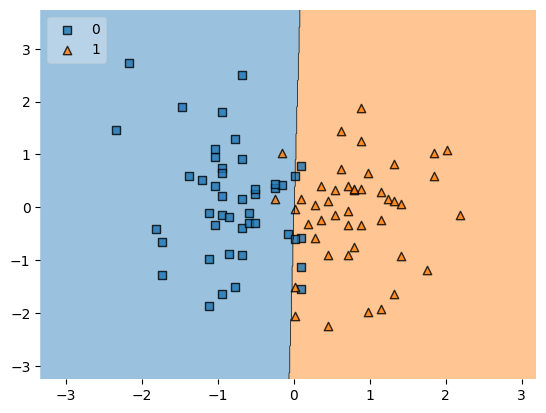

In [17]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2);
#here I plot the decision boundary by taking four parameters first one is the independent variable training data second one is the dependent variable training data third one is the object of logistic regression class
# fourth one is the legend which is optional but used for better visualization working of the decision boundary
#here all the dependent and independent variable should be in numpy array form so I convert the dependent variable into numpy array by using .values() function and independent variable is already in numpy array form because I used StandardScaler function

In [18]:
pickle.dump(clf,open('model.pkl','wb'));#this lines means I save the trained model clf into the file name model.pkl in write binary mode 'wb'